In [0]:
!pip install easycolab
import easycolab as ec
ec.mount()

  Created wheel for easycolab: filename=easycolab-0.1b29-cp36-none-any.whl size=4472 sha256=530580b8841679ae8c4096bf901bfb12bc3dc1cb1d46ab020dfe052a84437cdb
  Stored in directory: /root/.cache/pip/wheels/1b/c3/03/9d9371c4d3a117eff9caf88148e2f18ddf556543b4475055f1
Successfully built easycolab
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Opening directory /content/gdrive/My Drive/
Done!


In [0]:
import torch
from torch import nn
import torch.utils.data as torch_data
from torchvision import transforms
from torchvision import models
import torchvision
from tqdm import tqdm
import numpy as np
import os
import random
import PIL
import matplotlib.pyplot as plt
import time

In [0]:
class create_set(torch_data.Dataset):
    def __init__(self, path_X, path_y,transform=None):
        super(create_set, self).__init__()
        
        self.X=sorted(os.listdir(path_X))
        self.y=sorted(os.listdir(path_y))
        self.transform=transform
        self.path_X=path_X
        self.path_y=path_y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        X=PIL.Image.open(os.path.join(self.path_X,self.X[idx])).crop((0, 138, 768, 906.0)).resize((256,256)) 
        y=PIL.Image.open(os.path.join(self.path_y,self.y[idx])).crop((0, 138, 768, 906.0)).resize((256,256)) 
        if self.transform is not None:
            rand=np.random.randint(10**9)
            random.seed(rand)
            X=self.transform(X)
            random.seed(rand)
            y=self.transform(y)
        return X, y

In [0]:
train_set=create_set('./data/trainX/', './data/trainY/', transform=transforms.Compose([
        transforms.ToTensor()
        ]))

In [0]:
class create_set(torch_data.Dataset):
    def __init__(self, path_X, path_y,transform=None):
        super(create_set, self).__init__()       
        self.X=sorted(os.listdir(path_X))[0:5]
        self.y=sorted(os.listdir(path_y))[0:5]
        self.transform=transform
        self.path_X=path_X
        self.path_y=path_y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        X=PIL.Image.open(os.path.join(self.path_X,self.X[idx])).crop((0, 138, 768, 906.0)) 
        y=PIL.Image.open(os.path.join(self.path_y,self.y[idx])).crop((0, 138, 768, 906.0))
        if self.transform is not None:
            rand=np.random.randint(10**9)
            random.seed(rand)
            X=self.transform(X)
            random.seed(rand)
            y=self.transform(y)
        return X, y

In [0]:
test_set=create_set('./data/testX/', './data/testY/', 
                    transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
train_loader = torch_data.DataLoader(train_set, batch_size=1, shuffle=True) 


In [0]:
test_loader = torch_data.DataLoader(test_set, batch_size=1, shuffle=False)

In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [0]:
class UnFlatten(nn.Module):
    def forward(self, input, size=1):
        return input.view(input.size(0), size, 256, 256)

class SourceAutoEncoder(nn.Module):
    def __init__(self):
        super(SourceAutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
                        nn.Conv2d(3, 32, kernel_size=3, padding=1),
                        nn.BatchNorm2d(32),
                        nn.ReLU(True),

                        nn.Conv2d(32, 64, kernel_size=3,padding=1),
                        nn.BatchNorm2d(64),
                        nn.ReLU(True),


                        nn.Conv2d(64, 128, kernel_size=3,padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(True),

                        nn.Conv2d(128, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True),

                        nn.Conv2d(256, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True)
        )
        
        self.decoder = nn.Sequential(

          
                        nn.ConvTranspose2d(256, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(256, 128, kernel_size=3,padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(128, 64, kernel_size=3,padding=1),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(64, 32, kernel_size=3,padding=1),
                        nn.ReLU(True),
                        
                        nn.ConvTranspose2d(32, 3, kernel_size=3,padding=1),
                        nn.ReLU(True))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [0]:
class TargetAutoEncoder(nn.Module):
    def __init__(self):
        super(TargetAutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
                        nn.Conv2d(3, 32, kernel_size=3,padding=1),
                        nn.BatchNorm2d(32),
                        nn.ReLU(True),

                        nn.Conv2d(32, 64, kernel_size=3,padding=1),
                        nn.BatchNorm2d(64),
                        nn.ReLU(True),


                        nn.Conv2d(64, 128, kernel_size=3,padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(True),

                        nn.Conv2d(128, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True),

                        nn.Conv2d(256, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True)
        )
        
        self.decoder = nn.Sequential(

                    
                        nn.ConvTranspose2d(256, 256, kernel_size=3,padding=1),
                        nn.BatchNorm2d(256),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(256, 128, kernel_size=3,padding=1),
                        nn.BatchNorm2d(128),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(128, 64, kernel_size=3,padding=1),
                        nn.ReLU(True),

                        nn.ConvTranspose2d(64, 32, kernel_size=3,padding=1),
                        nn.ReLU(True),
                        
                        nn.ConvTranspose2d(32, 3, kernel_size=3,padding=1),
                        nn.ReLU(True))

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [0]:
class CoupledAutoEncoder(nn.Module):

    def __init__(self):
        super(CoupledAutoEncoder, self).__init__()

        self.ae1 = SourceAutoEncoder()
        self.ae2 = TargetAutoEncoder()

    def forward(self, x,y):
        x_encoded,x_decoded = self.ae1(x)
        y_encoded,y_decoded= self.ae2(y)

        x_decoded_couple=self.ae2.decoder(x_encoded)

        return x_decoded_couple, x_encoded, y_encoded, x_decoded, y_decoded

    def predict(self,x):
        x_encoded,x_decoded = self.ae1(x)

        x_decoded_couple=self.ae2.decoder(x_encoded)

        return x_decoded_couple, x_decoded


In [0]:
def loss_coupled_autoencoder(x,y, x_encoded, y_encoded, x_decoded, y_decoded,lambd,device):
    loss_source=nn.MSELoss().to(device)
    loss_target=nn.MSELoss().to(device)

    loss_coupled_term=nn.MSELoss().to(device)
    
    loss=loss_source(x_decoded,x)+loss_target(y_decoded,y)+lambd*loss_coupled_term(x_encoded,y_encoded)

    return loss

In [0]:
torch.cuda.is_available()

True

In [0]:


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

epochs = 200
autoencoder = CoupledAutoEncoder().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.0000001)
lambd=1

In [0]:
def train(epochs, net, criterion, optimizer, trainload, testloader, scheduler=None, verbose=True):
    start = time.time()
    net.to(device)
    best_val_loss = float('+inf')
    for epoch in range(epochs):
        running_loss = 0.0
        net.train()

        for i, (X, y) in enumerate(trainload):
            X = Variable(X).to(device)
            y=y.to(device)
            _, x_encoded, y_encoded, x_decoded, y_decoded = net(X,y)
            loss = loss_coupled_autoencoder(X,y, x_encoded, y_encoded, x_decoded, y_decoded,lambd,device)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        running_loss_val = 0.0
        net.eval()
        for i, (X,y) in enumerate(testloader):
 
            X = Variable(X).to(device)
            y=y.to(device)
            _, x_encoded, y_encoded, x_decoded, y_decoded = net(X,y)
            val_loss = loss_coupled_autoencoder(X,y, x_encoded, y_encoded, x_decoded, y_decoded,lambd,device)

            running_loss_val+=val_loss.item()
        if scheduler is not None:
            scheduler.step()
        freq = max(epochs//20,1)
        if verbose and epoch%freq==0:
            print('Epoch {}/{} || Loss:  Train {:.4f} | Validation {:.4f}'.format(epoch, epochs, running_loss, running_loss_val))

        if val_loss < best_val_loss:
          best_val_loss = val_loss
          torch.save(net.state_dict(), 'best_model.pth')

    end = time.time()
    print(f"Time cost for training (in seconds): {end-start}")

In [0]:
train(epochs, autoencoder, criterion, optimizer, train_loader, test_loader,  scheduler=None, verbose=True)

Epoch 0/200 || Loss:  Train 194.3513 | Validation 12.0685
Epoch 10/200 || Loss:  Train 141.7365 | Validation 8.0913
Epoch 20/200 || Loss:  Train 97.8814 | Validation 5.0120
Epoch 30/200 || Loss:  Train 71.5624 | Validation 3.5362
Epoch 40/200 || Loss:  Train 53.5040 | Validation 2.2690
Epoch 50/200 || Loss:  Train 41.0577 | Validation 1.8001
Epoch 60/200 || Loss:  Train 32.5270 | Validation 1.5408
Epoch 70/200 || Loss:  Train 26.6326 | Validation 1.1027
Epoch 80/200 || Loss:  Train 22.4659 | Validation 0.8171
Epoch 90/200 || Loss:  Train 19.4261 | Validation 0.9590
Epoch 100/200 || Loss:  Train 17.1415 | Validation 0.8175
Epoch 110/200 || Loss:  Train 15.3416 | Validation 0.5933
Epoch 120/200 || Loss:  Train 13.9125 | Validation 0.5623
Epoch 130/200 || Loss:  Train 12.7352 | Validation 0.6425
Epoch 140/200 || Loss:  Train 11.7660 | Validation 0.4511
Epoch 150/200 || Loss:  Train 10.9361 | Validation 0.5719
Epoch 160/200 || Loss:  Train 10.2173 | Validation 0.5320
Epoch 170/200 || Loss:

In [0]:
state_dict = torch.load('best_model.pth')
autoencoder.load_state_dict(state_dict)

<All keys matched successfully>

In [0]:
running_loss_val = 0.0
i = 0
reconstruction_time=[]
decoded_pics = []

with torch.no_grad():
    for (X,y) in test_loader:
        X = Variable(X).to(device)
        y=y.to(device)
        i += 1
        x_decoded_couple, x_encoded, y_encoded, x_decoded, y_decoded = autoencoder(X,y)
        decoded_pics.append(x_decoded_couple)
        loss_val = loss_coupled_autoencoder(X,y, x_encoded, y_encoded, x_decoded, y_decoded,lambd,device)
        running_loss_val += loss_val.data
print(running_loss_val)

tensor(0.2393, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


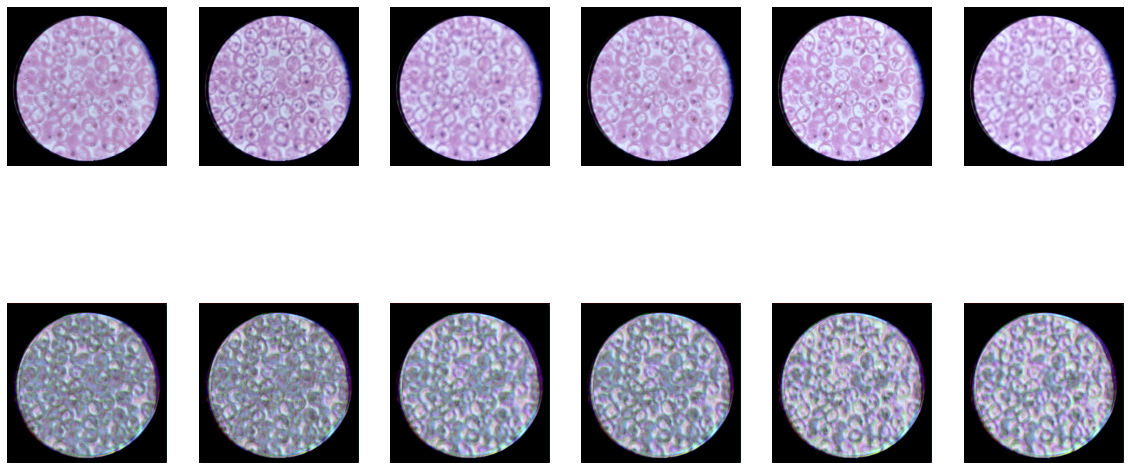

In [0]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))

for i, (X,y) in enumerate(test_loader):
    im = X
    ax[0, i].imshow(im.cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3));
    ax[1, i].imshow(decoded_pics[i].cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3))
    ax[0, i].axis('off')
    ax[1, i].axis('off')



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


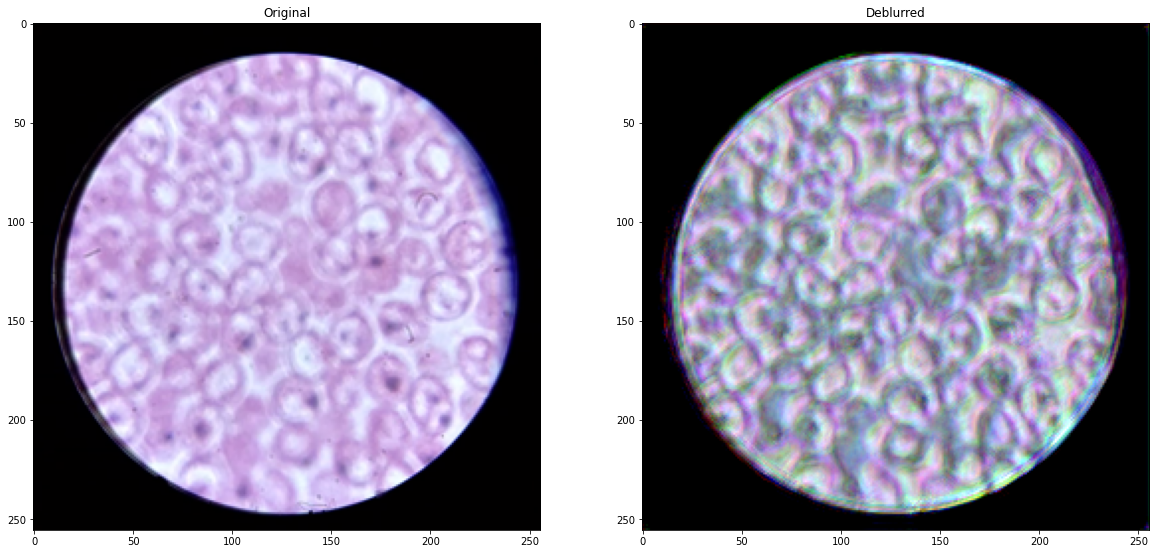

In [0]:
plt.figure(figsize=(20,10))

for i, (X,y) in enumerate(test_loader):
  if i==5:
    plt.subplot(1,2,1)
    plt.imshow(X.cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3));
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(decoded_pics[i].cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3))
    plt.title("Deblurred")
    plt.show()


In [0]:
running_loss_val = 0.0
i = 0
reconstruction_time=[]
decoded_1_pics = []

with torch.no_grad():
    for (X,y) in test_loader:
        X = Variable(X).to(device)
        y=y.to(device)
        i += 1
        x_decoded_couple, x_encoded, y_encoded, x_decoded, y_decoded = autoencoder(X,y)
        decoded_1_pics.append(x_decoded)
        loss_val = loss_coupled_autoencoder(X,y, x_encoded, y_encoded, x_decoded, y_decoded,lambd,device)
        running_loss_val += loss_val.data
print(running_loss_val)

tensor(0.2393, device='cuda:0')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


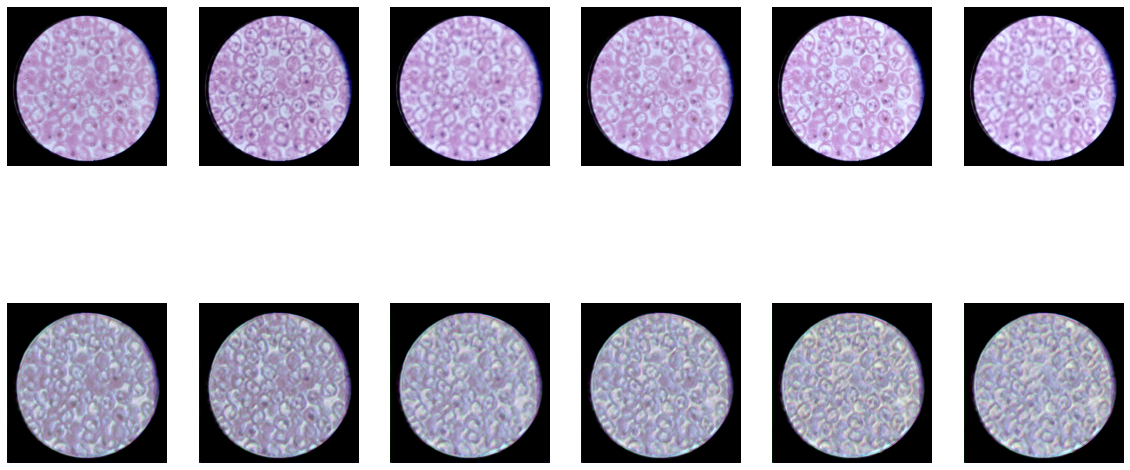

In [0]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))

for i, (X,y) in enumerate(test_loader):
    im = X
    ax[0, i].imshow(im.cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3));
    ax[1, i].imshow(decoded_1_pics[i].cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3))
    ax[0, i].axis('off')
    ax[1, i].axis('off')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


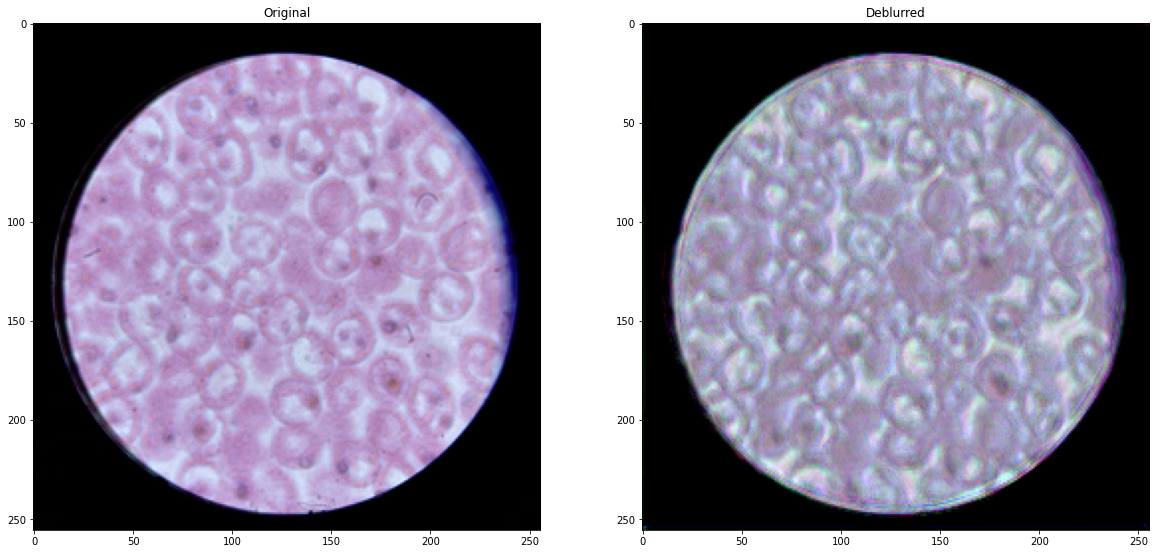

In [0]:
plt.figure(figsize=(20,10))

for i, (X,y) in enumerate(test_loader):
  if i==0:
    plt.subplot(1,2,1)
    plt.imshow(X.cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3));
    plt.title("Original")
    plt.subplot(1,2,2)
    plt.imshow(decoded_1_pics[i].cpu().numpy().transpose([0, 2, 3, 1]).reshape(256, 256,3))
    plt.title("Deblurred")
    plt.show()